In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from collections import Counter
from IPython.display import display
pd.options.display.max_columns = None
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier,RandomTreesEmbedding,IsolationForest,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('train__updated.csv')
dft=pd.read_csv('test__updated.csv')
df.head()

,index,year,month,day,hour,latitude,longitude,imma_version,attm_count,time_indicator,latlong_indicator,ship_course,ship_speed,national_source_indicator,id_indicator,wind_direction_indicator,wind_direction_true,wind_speed_indicator,wind_speed,visibility,present_weather,past_weather,sea_level_pressure,characteristic_of_ppp,amt_pressure_tend,indicator_for_temp,air_temperature,wbt_indicator,wetbulb_temperature,dpt_indicator,dewpoint_temperature,sst_measurement_method,sea_surface_temp,total_cloud_amount,lower_cloud_amount,wave_period,wave_height,swell_direction,swell_period,swell_height,ten_degree_box_number,one_degree_box_number,deck,source_id,platform_type,dup_status,dup_check,nightday_flag,source_exclusion_flags,release_no_primary,release_no_secondary,release_no_tertiary,release_status_indicator,intermediate_reject_flag
0,train_0,1978,1,1,0.0,48.8,-126.0,1,4,NaN,0,NaN,NaN,NaN,3,0,300,1.0,13.0,NaN,NaN,NaN,1010.6,7.0,2.9,NaN,6.8,NaN,NaN,NaN,NaN,1.0,11.2,NaN,NaN,8.0,350.0,NaN,NaN,NaN,165,86,793,103,6.0,1,2.0,2,NaN,3,0,1,0,1
1,train_1,1978,1,1,0.0,49.7,-127.9,1,4,NaN,0,NaN,NaN,NaN,3,0,310,1.0,15.0,NaN,NaN,NaN,1012.5,7.0,1.5,NaN,6.6,NaN,NaN,NaN,NaN,1.0,10.1,NaN,NaN,10.0,400.0,NaN,NaN,NaN,165,97,793,103,6.0,1,2.0,2,NaN,3,0,1,0,1
2,train_2,1978,1,1,0.0,50.9,-129.9,1,4,NaN,0,NaN,NaN,NaN,3,0,330,1.0,18.0,NaN,NaN,NaN,1015.6,7.0,0.5,NaN,6.8,NaN,NaN,NaN,NaN,1.0,9.2,NaN,NaN,12.0,550.0,NaN,NaN,NaN,129,9,793,103,6.0,1,2.0,2,NaN,3,0,1,0,1
3,train_3,1978,1,1,0.0,51.4,-128.8,1,4,NaN,0,NaN,NaN,NaN,3,0,340,1.0,15.0,NaN,NaN,NaN,1012.7,7.0,1.6,NaN,6.7,NaN,NaN,NaN,NaN,1.0,9.3,NaN,NaN,8.0,400.0,NaN,NaN,NaN,129,18,793,103,6.0,1,2.0,2,NaN,3,0,1,0,1
4,train_4,1978,1,1,0.0,49.3,-123.7,1,4,NaN,0,NaN,NaN,NaN,3,0,60,1.0,6.0,NaN,NaN,NaN,1009.7,7.0,3.1,NaN,2.2,NaN,NaN,NaN,NaN,1.0,6.6,NaN,NaN,4.0,50.0,NaN,NaN,NaN,165,93,793,103,6.0,1,2.0,2,NaN,3,0,1,0,1


In [3]:
df.shape

(50000, 54)

In [4]:
df.columns

Index(['index', 'year', 'month', 'day', 'hour', 'latitude', 'longitude',
       'imma_version', 'attm_count', 'time_indicator', 'latlong_indicator',
       'ship_course', 'ship_speed', 'national_source_indicator',
       'id_indicator', 'wind_direction_indicator', 'wind_direction_true',
       'wind_speed_indicator', 'wind_speed', 'visibility', 'present_weather',
       'past_weather', 'sea_level_pressure', 'characteristic_of_ppp',
       'amt_pressure_tend', 'indicator_for_temp', 'air_temperature',
       'wbt_indicator', 'wetbulb_temperature', 'dpt_indicator',
       'dewpoint_temperature', 'sst_measurement_method', 'sea_surface_temp',
       'total_cloud_amount', 'lower_cloud_amount', 'wave_period',
       'wave_height', 'swell_direction', 'swell_period', 'swell_height',
       'ten_degree_box_number', 'one_degree_box_number', 'deck', 'source_id',
       'platform_type', 'dup_status', 'dup_check', 'nightday_flag',
       'source_exclusion_flags', 'release_no_primary', 'release_no_se

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


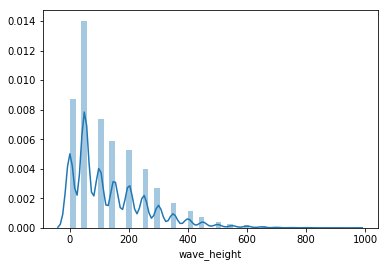

In [5]:
sns.distplot(df['wave_height'])

In [6]:
df.isnull().sum()

index                            0
year                             0
month                            0
day                              0
hour                             0
latitude                         0
longitude                        0
imma_version                     0
attm_count                       0
time_indicator               48743
latlong_indicator                0
ship_course                  48792
ship_speed                   48792
national_source_indicator    49899
id_indicator                     0
wind_direction_indicator         0
wind_direction_true              0
wind_speed_indicator             0
wind_speed                     250
visibility                   48781
present_weather              48975
past_weather                 48986
sea_level_pressure              92
characteristic_of_ppp        11282
amt_pressure_tend            11382
indicator_for_temp           48756
air_temperature               2109
wbt_indicator                49316
wetbulb_temperature 

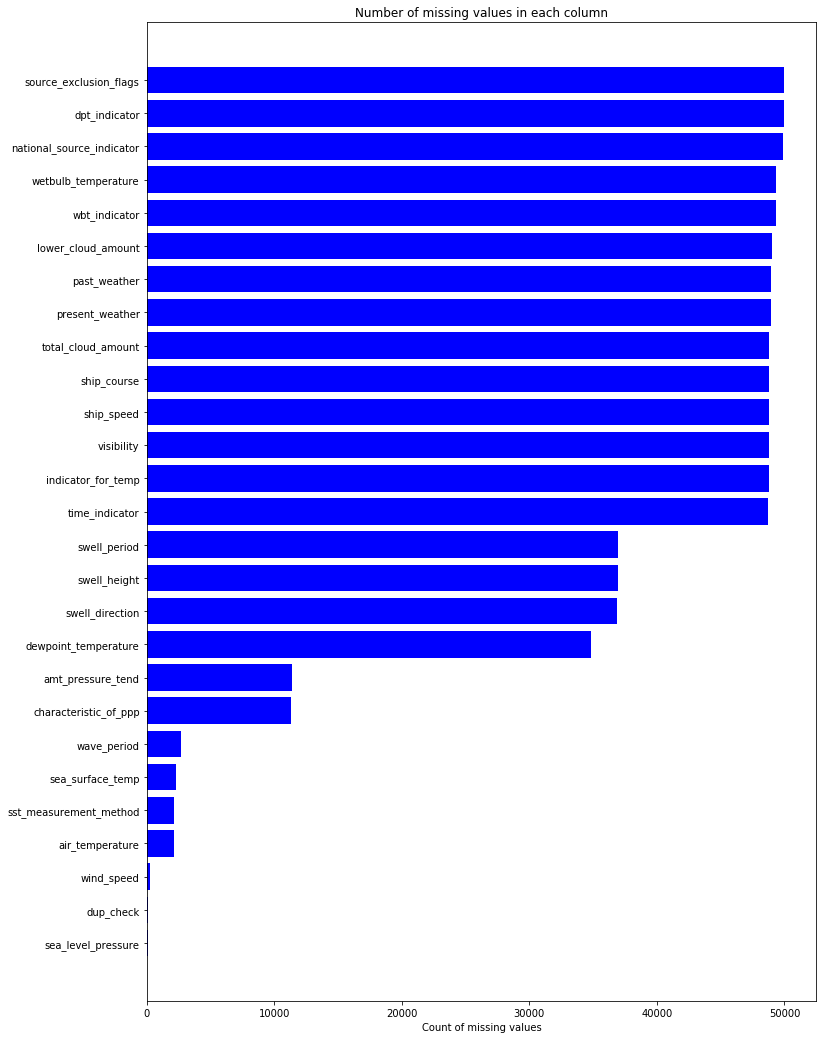

In [7]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [8]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.9]

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,column_name,missing_count,missing_ratio
9,time_indicator,48743,0.97486
11,ship_course,48792,0.97584
12,ship_speed,48792,0.97584
13,national_source_indicator,49899,0.99798
19,visibility,48781,0.97562
20,present_weather,48975,0.97950
21,past_weather,48986,0.97972
25,indicator_for_temp,48756,0.97512
27,wbt_indicator,49316,0.98632
28,wetbulb_temperature,49328,0.98656


In [9]:
S_remove=missing_df.ix[missing_df['missing_ratio']>0.9]

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [10]:
train_df=df.drop(S_remove['column_name'],axis=1)
train_df.head()

,index,year,month,day,hour,latitude,longitude,imma_version,attm_count,latlong_indicator,id_indicator,wind_direction_indicator,wind_direction_true,wind_speed_indicator,wind_speed,sea_level_pressure,characteristic_of_ppp,amt_pressure_tend,air_temperature,dewpoint_temperature,sst_measurement_method,sea_surface_temp,wave_period,wave_height,swell_direction,swell_period,swell_height,ten_degree_box_number,one_degree_box_number,deck,source_id,platform_type,dup_status,dup_check,nightday_flag,release_no_primary,release_no_secondary,release_no_tertiary,release_status_indicator,intermediate_reject_flag
0,train_0,1978,1,1,0.0,48.8,-126.0,1,4,0,3,0,300,1.0,13.0,1010.6,7.0,2.9,6.8,NaN,1.0,11.2,8.0,350.0,NaN,NaN,NaN,165,86,793,103,6.0,1,2.0,2,3,0,1,0,1
1,train_1,1978,1,1,0.0,49.7,-127.9,1,4,0,3,0,310,1.0,15.0,1012.5,7.0,1.5,6.6,NaN,1.0,10.1,10.0,400.0,NaN,NaN,NaN,165,97,793,103,6.0,1,2.0,2,3,0,1,0,1
2,train_2,1978,1,1,0.0,50.9,-129.9,1,4,0,3,0,330,1.0,18.0,1015.6,7.0,0.5,6.8,NaN,1.0,9.2,12.0,550.0,NaN,NaN,NaN,129,9,793,103,6.0,1,2.0,2,3,0,1,0,1
3,train_3,1978,1,1,0.0,51.4,-128.8,1,4,0,3,0,340,1.0,15.0,1012.7,7.0,1.6,6.7,NaN,1.0,9.3,8.0,400.0,NaN,NaN,NaN,129,18,793,103,6.0,1,2.0,2,3,0,1,0,1
4,train_4,1978,1,1,0.0,49.3,-123.7,1,4,0,3,0,60,1.0,6.0,1009.7,7.0,3.1,2.2,NaN,1.0,6.6,4.0,50.0,NaN,NaN,NaN,165,93,793,103,6.0,1,2.0,2,3,0,1,0,1


In [11]:
train_df.head()

,index,year,month,day,hour,latitude,longitude,imma_version,attm_count,latlong_indicator,id_indicator,wind_direction_indicator,wind_direction_true,wind_speed_indicator,wind_speed,sea_level_pressure,characteristic_of_ppp,amt_pressure_tend,air_temperature,dewpoint_temperature,sst_measurement_method,sea_surface_temp,wave_period,wave_height,swell_direction,swell_period,swell_height,ten_degree_box_number,one_degree_box_number,deck,source_id,platform_type,dup_status,dup_check,nightday_flag,release_no_primary,release_no_secondary,release_no_tertiary,release_status_indicator,intermediate_reject_flag
0,train_0,1978,1,1,0.0,48.8,-126.0,1,4,0,3,0,300,1.0,13.0,1010.6,7.0,2.9,6.8,NaN,1.0,11.2,8.0,350.0,NaN,NaN,NaN,165,86,793,103,6.0,1,2.0,2,3,0,1,0,1
1,train_1,1978,1,1,0.0,49.7,-127.9,1,4,0,3,0,310,1.0,15.0,1012.5,7.0,1.5,6.6,NaN,1.0,10.1,10.0,400.0,NaN,NaN,NaN,165,97,793,103,6.0,1,2.0,2,3,0,1,0,1
2,train_2,1978,1,1,0.0,50.9,-129.9,1,4,0,3,0,330,1.0,18.0,1015.6,7.0,0.5,6.8,NaN,1.0,9.2,12.0,550.0,NaN,NaN,NaN,129,9,793,103,6.0,1,2.0,2,3,0,1,0,1
3,train_3,1978,1,1,0.0,51.4,-128.8,1,4,0,3,0,340,1.0,15.0,1012.7,7.0,1.6,6.7,NaN,1.0,9.3,8.0,400.0,NaN,NaN,NaN,129,18,793,103,6.0,1,2.0,2,3,0,1,0,1
4,train_4,1978,1,1,0.0,49.3,-123.7,1,4,0,3,0,60,1.0,6.0,1009.7,7.0,3.1,2.2,NaN,1.0,6.6,4.0,50.0,NaN,NaN,NaN,165,93,793,103,6.0,1,2.0,2,3,0,1,0,1


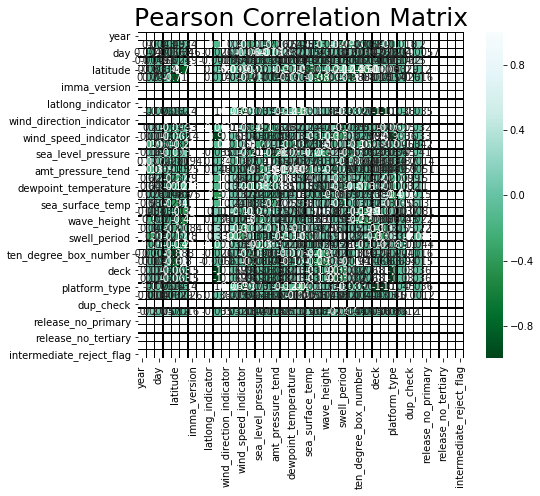

In [12]:
features=train_df.columns
f, ax = plt.subplots(figsize=(8,6))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(), linewidths=0.25, vmax=1.0, square=True, cmap="BuGn_r", linecolor='k', annot=True)

In [13]:
train_df.fillna(train_df.mean(),inplace=True)

In [14]:
s=train_df.std()==0
m=[]

In [15]:
for each in range(len(s)):
    if s[each]==True:
        m.append(s.index[each])

In [16]:
m

['year',
 'imma_version',
 'attm_count',
 'latlong_indicator',
 'wind_direction_indicator',
 'dup_check',
 'release_no_primary',
 'release_no_secondary',
 'release_no_tertiary',
 'release_status_indicator',
 'intermediate_reject_flag']

In [17]:
train_df=train_df.drop(m,axis=1)
train_df=train_df.drop(['index'],axis=1)

In [18]:
train_df.head()

,month,day,hour,latitude,longitude,id_indicator,wind_direction_true,wind_speed_indicator,wind_speed,sea_level_pressure,characteristic_of_ppp,amt_pressure_tend,air_temperature,dewpoint_temperature,sst_measurement_method,sea_surface_temp,wave_period,wave_height,swell_direction,swell_period,swell_height,ten_degree_box_number,one_degree_box_number,deck,source_id,platform_type,dup_status,nightday_flag
0,1,1,0.0,48.8,-126.0,3,300,1.0,13.0,1010.6,7.0,2.9,6.8,4.713828,1.0,11.2,8.0,350.0,25.102717,10.818021,1.783361,165,86,793,103,6.0,1,2
1,1,1,0.0,49.7,-127.9,3,310,1.0,15.0,1012.5,7.0,1.5,6.6,4.713828,1.0,10.1,10.0,400.0,25.102717,10.818021,1.783361,165,97,793,103,6.0,1,2
2,1,1,0.0,50.9,-129.9,3,330,1.0,18.0,1015.6,7.0,0.5,6.8,4.713828,1.0,9.2,12.0,550.0,25.102717,10.818021,1.783361,129,9,793,103,6.0,1,2
3,1,1,0.0,51.4,-128.8,3,340,1.0,15.0,1012.7,7.0,1.6,6.7,4.713828,1.0,9.3,8.0,400.0,25.102717,10.818021,1.783361,129,18,793,103,6.0,1,2
4,1,1,0.0,49.3,-123.7,3,60,1.0,6.0,1009.7,7.0,3.1,2.2,4.713828,1.0,6.6,4.0,50.0,25.102717,10.818021,1.783361,165,93,793,103,6.0,1,2


In [19]:
train_df.columns

Index(['month', 'day', 'hour', 'latitude', 'longitude', 'id_indicator',
       'wind_direction_true', 'wind_speed_indicator', 'wind_speed',
       'sea_level_pressure', 'characteristic_of_ppp', 'amt_pressure_tend',
       'air_temperature', 'dewpoint_temperature', 'sst_measurement_method',
       'sea_surface_temp', 'wave_period', 'wave_height', 'swell_direction',
       'swell_period', 'swell_height', 'ten_degree_box_number',
       'one_degree_box_number', 'deck', 'source_id', 'platform_type',
       'dup_status', 'nightday_flag'],
      dtype='object')

In [20]:
X=train_df.drop(['wave_height'],axis=1).values
Y=train_df['wave_height'].values
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
XG=XGBClassifier(n_estimators=100,learning_rate=0.5)
XG.fit(X_train,Y_train)
pred4=XG.predict(X_val)
pred4=np.array(pred4)
print(mean_squared_error(pred4,Y_val)**0.5)

45.834848459805485


In [23]:
train_dft=dft.drop(S_remove['column_name'],axis=1)
train_dft.head()

,index,year,month,day,hour,latitude,longitude,imma_version,attm_count,latlong_indicator,id_indicator,wind_direction_indicator,wind_direction_true,wind_speed_indicator,wind_speed,sea_level_pressure,characteristic_of_ppp,amt_pressure_tend,air_temperature,dewpoint_temperature,sst_measurement_method,sea_surface_temp,wave_period,swell_direction,swell_period,swell_height,ten_degree_box_number,one_degree_box_number,deck,source_id,platform_type,dup_status,dup_check,nightday_flag,release_no_primary,release_no_secondary,release_no_tertiary,release_status_indicator,intermediate_reject_flag
0,test_50000,1978,5,30,4.83,48.3,-123.2,1,4,0,3,0,250,1.0,12.0,1011.5,3.0,0.3,10.3,9.1,1.0,10.1,3.0,NaN,NaN,NaN,165,83,793,103,6.0,1,2.0,1,3,0,1,0,1
1,test_50001,1978,5,30,5.00,49.3,-123.7,1,4,0,3,0,110,1.0,4.0,1011.0,7.0,0.2,16.8,NaN,1.0,17.3,7.0,NaN,NaN,NaN,165,93,793,103,6.0,1,2.0,1,3,0,1,0,1
2,test_50002,1978,5,30,5.00,49.9,-125.0,1,4,0,3,0,340,1.0,2.0,1010.4,7.0,0.6,18.3,NaN,1.0,17.8,7.0,NaN,NaN,NaN,165,95,793,103,6.0,1,2.0,1,3,0,1,0,1
3,test_50003,1978,5,30,5.00,53.8,-128.8,1,4,0,3,0,210,1.0,8.0,1013.0,2.0,0.1,14.1,NaN,1.0,13.8,2.0,NaN,NaN,NaN,129,38,793,103,6.0,1,2.0,1,3,0,1,0,1
4,test_50004,1978,5,30,5.00,46.9,-125.0,1,4,0,3,0,280,1.0,3.0,1016.6,2.0,0.5,11.9,NaN,1.0,12.6,14.0,NaN,NaN,NaN,165,65,793,103,6.0,1,2.0,1,3,0,1,0,1


In [24]:
train_dft.fillna(train_dft.mean(),inplace=True)

In [25]:
train_dft=train_dft.drop(m,axis=1)
train_dft=train_dft.drop(['index'],axis=1)

In [26]:
X_test=train_dft.values

In [27]:
sub=pd.read_csv('sample_sub.csv')

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier,RandomTreesEmbedding,IsolationForest,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [29]:
lb=LabelEncoder()
train_df['wave_height']=lb.fit_transform(train_df['wave_height'])

In [30]:
train_df.head()

,month,day,hour,latitude,longitude,id_indicator,wind_direction_true,wind_speed_indicator,wind_speed,sea_level_pressure,characteristic_of_ppp,amt_pressure_tend,air_temperature,dewpoint_temperature,sst_measurement_method,sea_surface_temp,wave_period,wave_height,swell_direction,swell_period,swell_height,ten_degree_box_number,one_degree_box_number,deck,source_id,platform_type,dup_status,nightday_flag
0,1,1,0.0,48.8,-126.0,3,300,1.0,13.0,1010.6,7.0,2.9,6.8,4.713828,1.0,11.2,8.0,7,25.102717,10.818021,1.783361,165,86,793,103,6.0,1,2
1,1,1,0.0,49.7,-127.9,3,310,1.0,15.0,1012.5,7.0,1.5,6.6,4.713828,1.0,10.1,10.0,8,25.102717,10.818021,1.783361,165,97,793,103,6.0,1,2
2,1,1,0.0,50.9,-129.9,3,330,1.0,18.0,1015.6,7.0,0.5,6.8,4.713828,1.0,9.2,12.0,11,25.102717,10.818021,1.783361,129,9,793,103,6.0,1,2
3,1,1,0.0,51.4,-128.8,3,340,1.0,15.0,1012.7,7.0,1.6,6.7,4.713828,1.0,9.3,8.0,8,25.102717,10.818021,1.783361,129,18,793,103,6.0,1,2
4,1,1,0.0,49.3,-123.7,3,60,1.0,6.0,1009.7,7.0,3.1,2.2,4.713828,1.0,6.6,4.0,1,25.102717,10.818021,1.783361,165,93,793,103,6.0,1,2


In [31]:
X=train_df.drop(['wave_height'],axis=1).values
Y=train_df['wave_height'].values

In [32]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3)

In [33]:
RF=RandomForestClassifier(n_estimators=100,)
RF.fit(X_train,Y_train)
pred_RF=RF.predict(X_val)

In [34]:
DT=DecisionTreeClassifier(max_depth=100)
DT.fit(X_train,Y_train)
pred_DT=DT.predict(X_val)

In [35]:
ET=ExtraTreesClassifier(n_estimators=100)
ET.fit(X_train,Y_train)
pred_ET=ET.predict(X_val)

In [36]:
XG=XGBClassifier(n_estimators=100,learning_rate=0.5)
XG.fit(X_train,Y_train)
pred4=XG.predict(X_val)

In [37]:
pred_RF=lb.inverse_transform(pred_RF)

In [38]:
pred_DT=lb.inverse_transform(pred_DT)

In [39]:
pred4=lb.inverse_transform(pred4)

In [40]:
pred_ET=lb.inverse_transform(pred_ET)

In [41]:
Y_val=lb.inverse_transform(Y_val)

In [42]:
pred_RF

array([150.,  50.,  50., ...,  50.,  50., 150.])

In [43]:
print(mean_squared_error(pred4,Y_val)**0.5)

43.711173247428015


In [44]:
print(mean_squared_error(pred_DT,Y_val)**0.5)

44.36965930302674


In [45]:
print(mean_squared_error(pred_RF,Y_val)**0.5)

30.14962686336267


In [46]:
print(mean_squared_error(pred_ET,Y_val)**0.5)

30.284759643534677


In [47]:
RF.feature_importances_

array([0.02646294, 0.06402848, 0.05407538, 0.0423349 , 0.05679401,
       0.00133447, 0.06110469, 0.00168288, 0.11188138, 0.08065941,
       0.01888896, 0.04531674, 0.06977047, 0.01776   , 0.00216142,
       0.06834861, 0.17146742, 0.01637836, 0.01398817, 0.02109199,
       0.00567865, 0.03285785, 0.00126876, 0.00118264, 0.00124853,
       0.0001756 , 0.0120573 ])

In [48]:
train_dft.head()

,month,day,hour,latitude,longitude,id_indicator,wind_direction_true,wind_speed_indicator,wind_speed,sea_level_pressure,characteristic_of_ppp,amt_pressure_tend,air_temperature,dewpoint_temperature,sst_measurement_method,sea_surface_temp,wave_period,swell_direction,swell_period,swell_height,ten_degree_box_number,one_degree_box_number,deck,source_id,platform_type,dup_status,nightday_flag
0,5,30,4.83,48.3,-123.2,3,250,1.0,12.0,1011.5,3.0,0.3,10.3,9.100000,1.0,10.1,3.0,26.735725,8.637058,1.216455,165,83,793,103,6.0,1,1
1,5,30,5.00,49.3,-123.7,3,110,1.0,4.0,1011.0,7.0,0.2,16.8,11.500167,1.0,17.3,7.0,26.735725,8.637058,1.216455,165,93,793,103,6.0,1,1
2,5,30,5.00,49.9,-125.0,3,340,1.0,2.0,1010.4,7.0,0.6,18.3,11.500167,1.0,17.8,7.0,26.735725,8.637058,1.216455,165,95,793,103,6.0,1,1
3,5,30,5.00,53.8,-128.8,3,210,1.0,8.0,1013.0,2.0,0.1,14.1,11.500167,1.0,13.8,2.0,26.735725,8.637058,1.216455,129,38,793,103,6.0,1,1
4,5,30,5.00,46.9,-125.0,3,280,1.0,3.0,1016.6,2.0,0.5,11.9,11.500167,1.0,12.6,14.0,26.735725,8.637058,1.216455,165,65,793,103,6.0,1,1


In [49]:
pred=RF.predict(X_test)
pred=lb.inverse_transform(pred)
dfans=pd.DataFrame({
    'index':sub['index'],
    'wave_height':pred
})
dfans.to_csv('predictions.csv',index=False)

In [50]:
pred

array([100.,  50., 100., ...,  50., 100.,  50.])

In [51]:
Z=np.zeros((20,30))
for i in range(20):
    for j in range(30):
        Z[i][j]=len(train_df[train_df['month']==1][train_df['day']==j][train_df['wave_height']==i])

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


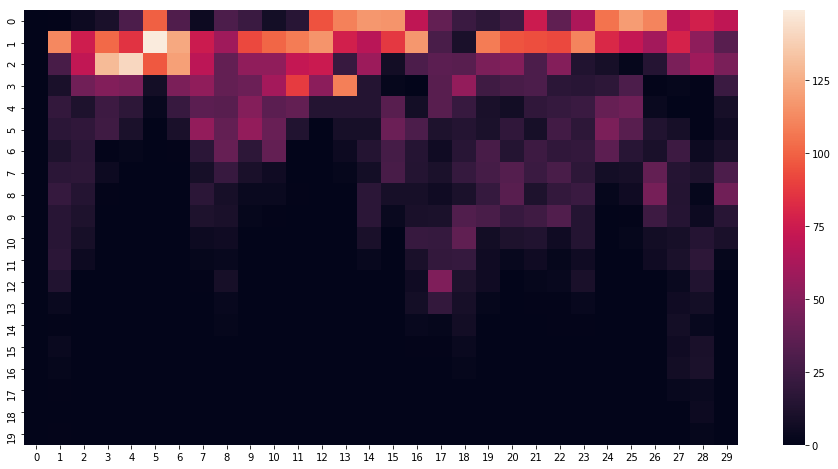

In [52]:
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(Z)

In [53]:
Z=np.zeros((20,30))
for i in range(20):
    for j in range(30):
        Z[i][j]=len(train_df[train_df['month']==2][train_df['day']==j][train_df['wave_height']==i])

/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/yuvraj/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


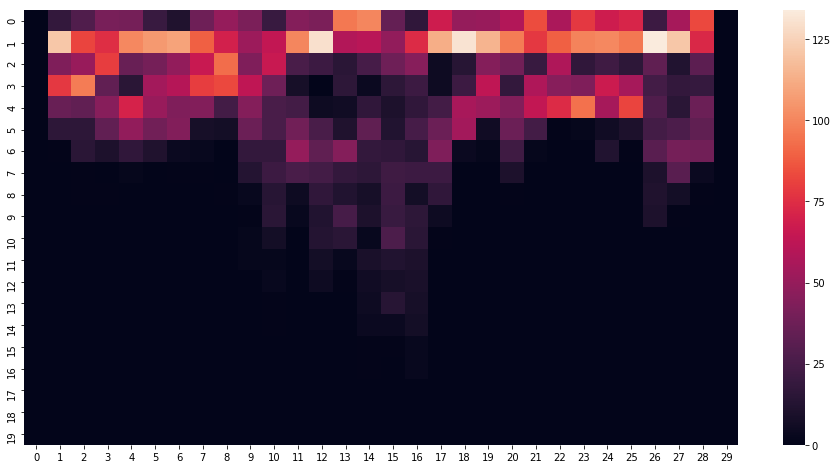

In [54]:
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(Z)

In [55]:
train_df['wind_speed'].unique()

array([13.        , 15.        , 18.        ,  6.        , 13.9       ,
        2.        , 10.        , 12.        ,  7.        , 11.        ,
        4.        ,  9.        , 16.        ,  5.        , 14.        ,
       12.3       , 19.        ,  3.        ,  8.        , 17.        ,
       25.7       ,  1.        ,  9.8       , 11.3       , 12.9       ,
       13.4       , 15.4       , 10.3       ,  7.2       ,  6.7       ,
        1.5       ,  6.41013266,  2.1       ,  3.1       ,  3.6       ,
        4.6       ,  5.1       ,  8.7       ,  5.7       ,  9.3       ,
        0.5       ,  6.2       ,  4.1       ,  7.7       ,  8.2       ,
        2.6       , 20.        , 23.2       , 20.6       , 10.8       ,
       21.        , 22.        , 16.5       , 14.4       , 11.8       ,
       19.5       , 21.1       , 23.7       , 22.1       , 14.9       ,
       20.1       , 18.5       , 17.5       , 15.9       ])

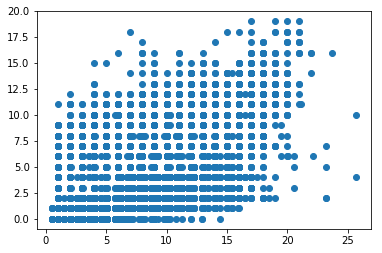

In [56]:
plt.scatter(train_df['wind_speed'],train_df['wave_height'])

In [57]:
votingC=VotingClassifier([('RF',RF),('ET',ET)],voting='soft')
votingC.fit(X_train,Y_train)
pred=votingC.predict(X_val)

In [58]:
pred=lb.inverse_transform(pred)

In [59]:
print(mean_squared_error(pred,Y_val)**0.5)

29.532468008391486


In [60]:
pred=votingC.predict(X_test)
pred=lb.inverse_transform(pred)
dfans=pd.DataFrame({
    'index':sub['index'],
    'wave_height':pred
})
dfans.to_csv('predictions.csv',index=False)

In [61]:
new=[]

In [62]:
for each in range(len(Y_val)):
    if Y_val[each]>pred_RF[each]:
        new.append(1)
    if Y_val[each]==pred_RF[each]:
        new.append(0)
    if Y_val[each]<pred_RF[each]:
        new.append(-1)

In [63]:
new=np.array(new)

In [64]:
sum(new==0)

11745

In [65]:
sum(new==1)

1907

In [66]:
sum(new==2)

0

In [75]:
X_train2,X_val2,Y_train2,Y_val2=train_test_split(X_val,new,test_size=0.3,shuffle=False)

In [76]:
RF2=RandomForestClassifier(n_estimators=100,)
RF2.fit(X_train2,Y_train2)
pred_RF2=RF2.predict(X_val2)

In [77]:
confusion_matrix(pred_RF2,Y_val2)

array([[  32,   42,   10],
       [ 366, 3386,  527],
       [  23,   53,   61]])

In [78]:
pred_RF2

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
pred_RFx=pred_RF[10500:15000]+pred_RF2*50

In [83]:
print(mean_squared_error(pred_RFx,Y_val[10500:15000])**0.5)

31.437769216872457


In [85]:
train_df.head()

,month,day,hour,latitude,longitude,id_indicator,wind_direction_true,wind_speed_indicator,wind_speed,sea_level_pressure,characteristic_of_ppp,amt_pressure_tend,air_temperature,dewpoint_temperature,sst_measurement_method,sea_surface_temp,wave_period,wave_height,swell_direction,swell_period,swell_height,ten_degree_box_number,one_degree_box_number,deck,source_id,platform_type,dup_status,nightday_flag
0,1,1,0.0,48.8,-126.0,3,300,1.0,13.0,1010.6,7.0,2.9,6.8,4.713828,1.0,11.2,8.0,7,25.102717,10.818021,1.783361,165,86,793,103,6.0,1,2
1,1,1,0.0,49.7,-127.9,3,310,1.0,15.0,1012.5,7.0,1.5,6.6,4.713828,1.0,10.1,10.0,8,25.102717,10.818021,1.783361,165,97,793,103,6.0,1,2
2,1,1,0.0,50.9,-129.9,3,330,1.0,18.0,1015.6,7.0,0.5,6.8,4.713828,1.0,9.2,12.0,11,25.102717,10.818021,1.783361,129,9,793,103,6.0,1,2
3,1,1,0.0,51.4,-128.8,3,340,1.0,15.0,1012.7,7.0,1.6,6.7,4.713828,1.0,9.3,8.0,8,25.102717,10.818021,1.783361,129,18,793,103,6.0,1,2
4,1,1,0.0,49.3,-123.7,3,60,1.0,6.0,1009.7,7.0,3.1,2.2,4.713828,1.0,6.6,4.0,1,25.102717,10.818021,1.783361,165,93,793,103,6.0,1,2


In [104]:
var=train_df['wind_speed']/train_df['wave_period']
for each in range(len(var)):
    if var[each]>1000:
        var[each]=1.2352139402034186

In [105]:
np.mean(var[var<1000])

1.2352139402034188

In [106]:
train_df['var']=var

In [107]:
X=train_df.drop(['wave_height'],axis=1).values
Y=train_df['wave_height'].values

In [108]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3)

In [113]:
RF=RandomForestClassifier(n_estimators=100,)
RF.fit(X_train,Y_train)
pred_RF=RF.predict(X_val)

In [114]:
pred_RF=lb.inverse_transform(pred_RF)

In [115]:
Y_val=lb.inverse_transform(Y_val)

In [116]:
print(mean_squared_error(pred_RF,Y_val)**0.5)

33.090784215548595
